In [1]:
import pandas as pd

# Load the CSV file
movies_df = pd.read_csv('movies.csv')

# Get the shape of the DataFrame
shape = movies_df.shape

print(shape)


(9742, 3)


In [2]:
import pandas as pd

# Load the CSV file
movies_df = pd.read_csv('ratings.csv')

# Get the shape of the DataFrame
shape = movies_df.shape

print(shape)



(100836, 4)


In [3]:
import pandas as pd

# Load the CSV file
ratings_df = pd.read_csv('ratings.csv')

# Get the number of unique userId values
unique_user_ids = ratings_df['userId'].nunique()

unique_user_ids


610

In [4]:
import pandas as pd

# Load the CSV file
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group by movieId and count the number of ratings for each movie
ratings_count = ratings_df.groupby('movieId').size().reset_index(name='count')

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = ratings_count.loc[ratings_count['count'].idxmax()]['movieId']

# Get the movie title corresponding to the movieId
max_ratings_movie_title = movies_df[movies_df['movieId'] == max_ratings_movie_id]['title'].values[0]

max_ratings_movie_title


'Forrest Gump (1994)'

In [5]:
import pandas as pd

# Load the CSV files
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')

# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Select all tags for the movie "Matrix, The (1999)"
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag'].unique()

matrix_tags


array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [6]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Select all ratings for the movie "Terminator 2: Judgment Day (1991)"
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating']

# Calculate the average rating
average_rating = terminator_ratings.mean()

average_rating


np.float64(3.970982142857143)

In [9]:
!pip install matplotlib


     |████████████████████████████████| 8.3 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 48.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 79.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 36.4 MB/s eta 0:00:01


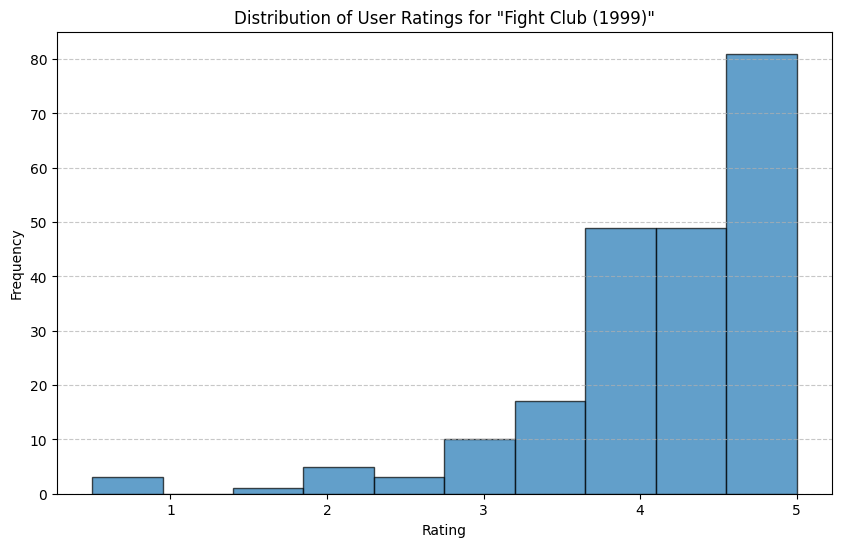

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Select all ratings for the movie "Fight Club (1999)"
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Step 1: Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# Step 2: Apply inner join on DataFrame created from movies.csv and the grouped DataFrame from step 1
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Display the filtered DataFrame
print(filtered_movies)


      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [14]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and calculate the mean rating
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_mean=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Filter out movies with less than 50 ratings to ensure reliability
filtered_ratings = grouped_ratings[grouped_ratings['rating_count'] > 50]

# Find the movieId with the highest average rating
most_popular_movie_id = filtered_ratings.loc[filtered_ratings['rating_mean'].idxmax()]['movieId']

# Get the movie title corresponding to the movieId
most_popular_movie_title = movies_df[movies_df['movieId'] == most_popular_movie_id]['title'].values[0]

most_popular_movie_title


'Shawshank Redemption, The (1994)'

In [15]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group the user ratings based on movieId and count the number of ratings for each movie
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count')
).reset_index()

# Find the top 5 movies with the highest number of ratings
top_5_movies = grouped_ratings.nlargest(5, 'rating_count')

# Merge with the movies DataFrame to get the movie titles
top_5_movies_with_titles = pd.merge(top_5_movies, movies_df, on='movieId', how='inner')

# Select the relevant columns
top_5_movies_with_titles = top_5_movies_with_titles[['movieId', 'title', 'rating_count']]

# Display the top 5 movies
print(top_5_movies_with_titles)


   movieId                             title  rating_count
0      356               Forrest Gump (1994)           329
1      318  Shawshank Redemption, The (1994)           317
2      296               Pulp Fiction (1994)           307
3      593  Silence of the Lambs, The (1991)           279
4     2571                Matrix, The (1999)           278


In [16]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Filter for Sci-Fi movies
sci_fi_movies = movies_df[movies_df['genres'].str.contains('Sci-Fi', na=False)]

# Group the user ratings based on movieId and count the number of ratings for each movie
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count')
).reset_index()

# Merge the grouped ratings DataFrame with the Sci-Fi movies DataFrame
sci_fi_ratings = pd.merge(sci_fi_movies, grouped_ratings, on='movieId', how='inner')

# Sort the Sci-Fi movies by the number of ratings in descending order
sci_fi_ratings_sorted = sci_fi_ratings.sort_values(by='rating_count', ascending=False)

# Get the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi_movie = sci_fi_ratings_sorted.iloc[2]

# Display the movie title
third_most_popular_sci_fi_movie_title = third_most_popular_sci_fi_movie['title']
third_most_popular_sci_fi_movie_title

'Jurassic Park (1993)'

In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Read the CSV file
df = pd.read_csv('links.csv')
print(df)

      movieId   imdbId    tmdbId
0           1   114709     862.0
1           2   113497    8844.0
2           3   113228   15602.0
3           4   114885   31357.0
4           5   113041   11862.0
...       ...      ...       ...
9737   193581  5476944  432131.0
9738   193583  5914996  445030.0
9739   193585  6397426  479308.0
9740   193587  8391976  483455.0
9741   193609   101726   37891.0

[9742 rows x 3 columns]


In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json

# Step 1: Load the CSV files
links_df = pd.read_csv('links.csv')

# Step 2: Merge the filtered_movies DataFrame with the links DataFrame to get the IMDb IDs
merged_df = pd.merge(filtered_movies, links_df, on='movieId', how='inner')

# Step 3: Function to scrape IMDb reviews
def scrape_imdb_reviews(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/reviews'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    reviews = []
    for review in soup.find_all('div', class_='text show-more__control'):
        reviews.append(review.get_text())
    
    return reviews

# Step 4: Scrape reviews for each movie
all_reviews = {}
for index, row in merged_df.iterrows():
    imdb_id = row['imdbId']
    movie_title = row['title']
    reviews = scrape_imdb_reviews(imdb_id)
    all_reviews[movie_title] = reviews

# Step 5: Print or save the reviews
for movie_title, reviews in all_reviews.items():
    print(f"Reviews for {movie_title}:")
    for review in reviews:
        print(review)
    print("\n" + "="*80 + "\n")

# Optionally, save the reviews to a file
with open('imdb_reviews.json', 'w') as f:
    json.dump(all_reviews, f, indent=4)

Reviews for Toy Story (1995):


Reviews for Jumanji (1995):


Reviews for Grumpier Old Men (1995):


Reviews for Heat (1995):


Reviews for Sabrina (1995):


Reviews for GoldenEye (1995):


Reviews for American President, The (1995):


Reviews for Casino (1995):


Reviews for Sense and Sensibility (1995):


Reviews for Ace Ventura: When Nature Calls (1995):


Reviews for Get Shorty (1995):


Reviews for Leaving Las Vegas (1995):


Reviews for Twelve Monkeys (a.k.a. 12 Monkeys) (1995):


Reviews for Babe (1995):


Reviews for Dead Man Walking (1995):


Reviews for Clueless (1995):


Reviews for Seven (a.k.a. Se7en) (1995):


Reviews for Pocahontas (1995):


Reviews for Usual Suspects, The (1995):


Reviews for Mr. Holland's Opus (1995):


Reviews for From Dusk Till Dawn (1996):


Reviews for Broken Arrow (1996):


Reviews for Happy Gilmore (1996):


Reviews for Braveheart (1995):


Reviews for Taxi Driver (1976):


Reviews for Birdcage, The (1996):


Reviews for Bad Boys (1995):


Revie

In [23]:
import json
import pandas as pd

# Load the JSON file
with open('imdb_reviews.json', 'r') as f:
    reviews_data = json.load(f)

# Load the links.csv file to get the mapping between movieId and imdbId
links_df = pd.read_csv('links.csv')

# Function to scrape IMDb rating
def scrape_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    rating = soup.find('span', itemprop='ratingValue')
    if rating:
        return float(rating.get_text())
    return None

# Scrape ratings for each movie in the reviews data
ratings = {}
for movie_title in reviews_data.keys():
    # Find the imdbId for the movie title
    imdb_id = links_df[links_df['title'] == movie_title]['imdbId'].values[0]
    rating = scrape_imdb_rating(imdb_id)
    if rating is not None:
        ratings[movie_title] = rating

# Find the movie title with the highest rating
highest_rated_movie_title = max(ratings, key=ratings.get)
highest_rating = ratings[highest_rated_movie_title]

# Find the movieId for the highest rated movie
highest_rated_movie_id = links_df[links_df['title'] == highest_rated_movie_title]['movieId'].values[0]

print(f"The movieId with the highest IMDb rating is {highest_rated_movie_id} with a rating of {highest_rating}.")


KeyError: 'title'